In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\tanis\Downloads\Projects-20240722T093004Z-001\Projects\heart_disease\Heart Disease\dataset.csv")

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.shape

(1190, 12)

In [5]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


No need for null value removal as well as normalization as we already know no null vales present and no huge values in dataset so normalization isnt exactly necessary. We will proceed with checking for outliers and removing them if any.

In [7]:
from scipy import stats

numerical_cols_iqr = ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

for col in numerical_cols_iqr:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"IQR method applied to '{col}'. Current shape: {df.shape}")
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame for IQR method.")

IQR method applied to 'resting bp s'. Current shape: (1153, 12)
IQR method applied to 'cholesterol'. Current shape: (968, 12)
IQR method applied to 'max heart rate'. Current shape: (968, 12)
IQR method applied to 'oldpeak'. Current shape: (952, 12)


Now we will proceed with the training and train it with a few algorithms to get the best one 

In [22]:
#Importing Modules

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [13]:
#Necessary Steps

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (761, 11), Test set shape: (191, 11)


In [15]:
numerical_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [16]:
#Logistic Regression

print("\n--- Logistic Regression ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') 
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


--- Logistic Regression ---
Accuracy: 0.7801047120418848
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       104
           1       0.77      0.74      0.75        87

    accuracy                           0.78       191
   macro avg       0.78      0.78      0.78       191
weighted avg       0.78      0.78      0.78       191



In [17]:
#Decision Tree

print("\n--- Decision Tree Classifier ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


--- Decision Tree Classifier ---
Accuracy: 0.9057591623036649
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       104
           1       0.90      0.90      0.90        87

    accuracy                           0.91       191
   macro avg       0.91      0.91      0.91       191
weighted avg       0.91      0.91      0.91       191



In [18]:
#Random Forest

print("\n--- Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


--- Random Forest Classifier ---
Accuracy: 0.9109947643979057
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       104
           1       0.88      0.93      0.91        87

    accuracy                           0.91       191
   macro avg       0.91      0.91      0.91       191
weighted avg       0.91      0.91      0.91       191



In [19]:
#SVM

print("\n--- Support Vector Machine (SVM) ---")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


--- Support Vector Machine (SVM) ---
Accuracy: 0.806282722513089
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       104
           1       0.76      0.85      0.80        87

    accuracy                           0.81       191
   macro avg       0.81      0.81      0.81       191
weighted avg       0.81      0.81      0.81       191



In [20]:
#KNN

print("\n--- K-Nearest Neighbors (KNN) ---")
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.8010471204188482
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       104
           1       0.77      0.80      0.79        87

    accuracy                           0.80       191
   macro avg       0.80      0.80      0.80       191
weighted avg       0.80      0.80      0.80       191



In [21]:
#Gradient Boosting

print("\n--- Gradient Boosting Classifier (Bonus) ---")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


--- Gradient Boosting Classifier (Bonus) ---
Accuracy: 0.8900523560209425
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       104
           1       0.87      0.90      0.88        87

    accuracy                           0.89       191
   macro avg       0.89      0.89      0.89       191
weighted avg       0.89      0.89      0.89       191



In [23]:
#XGBoost

print("\n--- XGBoost Classifier ---")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              eval_metric='logloss',       
                              use_label_encoder=False,    
                              n_estimators=100,            
                              learning_rate=0.1,          
                              random_state=42              
                             )
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


--- XGBoost Classifier ---


C:\Users\tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:10:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.93717277486911
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       104
           1       0.92      0.94      0.93        87

    accuracy                           0.94       191
   macro avg       0.94      0.94      0.94       191
weighted avg       0.94      0.94      0.94       191



Hence , we can see XGBoost is the best algorithm for the following dataset. Lets try it with hyperparamater tuning and see if it can become better.

In [24]:
# XGBoost Hypertuned

from sklearn.model_selection import GridSearchCV

print("\n--- XGBoost Classifier with Hyperparameter Tuning (GridSearchCV) ---")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              eval_metric='logloss',       
                              use_label_encoder=False,     
                              random_state=42             
                             )
param_grid = {
    'n_estimators': [100, 200, 300],          
    'learning_rate': [0.01, 0.1, 0.2],        
    'max_depth': [3, 5, 7],                   
    'subsample': [0.7, 0.8, 1.0],             
    'colsample_bytree': [0.7, 0.8, 1.0],      
    'gamma': [0, 0.1, 0.2]                   
}
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2) 
print("\nStarting Grid Search for best hyperparameters... This might take a while.")
grid_search.fit(X_train, y_train)
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))
best_xgb_model = grid_search.best_estimator_
print("\nTraining final XGBoost model with best parameters on the entire training set...")
best_xgb_model.fit(X_train, y_train)
y_pred_best_xgb = best_xgb_model.predict(X_test)
print("\n--- Evaluation on Test Set with Best XGBoost Model ---")
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


--- XGBoost Classifier with Hyperparameter Tuning (GridSearchCV) ---

Starting Grid Search for best hyperparameters... This might take a while.
Fitting 5 folds for each of 729 candidates, totalling 3645 fits


C:\Users\tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:15:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:15:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation accuracy: 0.9172

Training final XGBoost model with best parameters on the entire training set...

--- Evaluation on Test Set with Best XGBoost Model ---
Accuracy: 0.93717277486911
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       104
           1       0.93      0.93      0.93        87

    accuracy                           0.94       191
   macro avg       0.94      0.94      0.94       191
weighted avg       0.94      0.94      0.94       191



Now , lets make a barchart to show all accuracies in a systematic manner.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

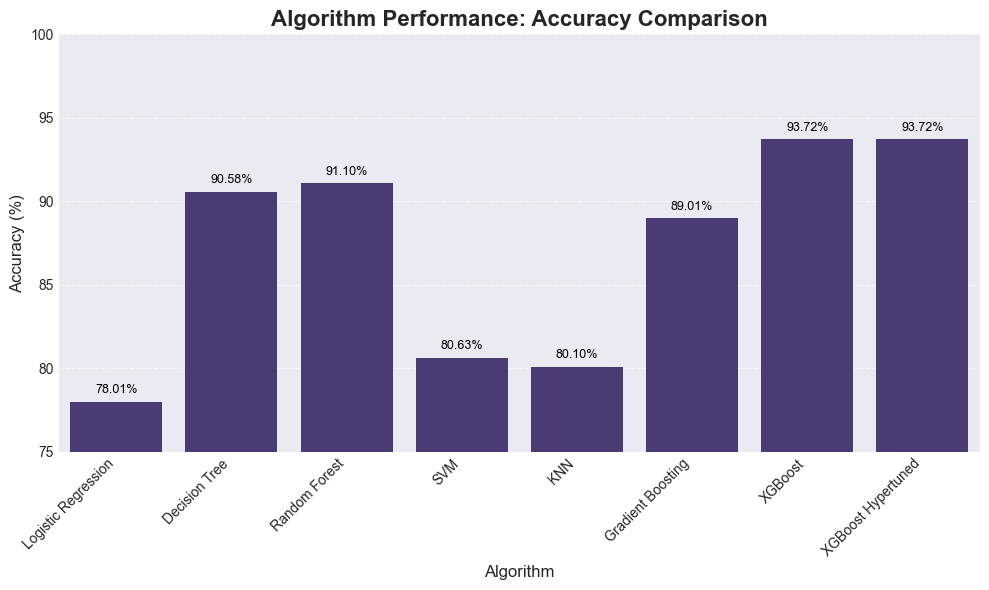

In [28]:
#Graph

data = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting', 'XGBoost', 'XGBoost Hypertuned'],
    'Accuracy': [78.01, 90.58, 91.1, 80.63, 80.1, 89.01, 93.72, 93.72],
}

df1 = pd.DataFrame(data)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

plt.figure(figsize=(10, 6))

sns.barplot(x='Algorithm', y='Accuracy', data=df1)

plt.title('Algorithm Performance: Accuracy Comparison', fontsize=16, weight='bold')
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(75, 100) 
plt.xticks(rotation=45, ha='right')

for index, row in df1.iterrows():
    plt.text(index, row['Accuracy'] + 0.5, f'{row["Accuracy"]:.2f}%', 
             color='black', ha="center", fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()